In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from src.OED import *
from src.DQN import *
from src.GA import *
from pde.Burgers2D import *

In [4]:
ib_config = Burgers2DConfig()
ib_eq = Burgers2D(ib_config)

## DQN

In [5]:
seed = None
gym_config = OEDGymConfig()
gym_config.n_sensor = 4

gym_config.n_components_rewards = 4

### Old action space

In [6]:
gym_config.old_action_space = True

In [7]:
ib_dqn_old_a = DQN_OED(seed, pde_system=ib_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model_name = "ib_dqn_old_a_1"
ib_dqn_old_a.train(model_name, total_timesteps=50000, log_interval=10)

Logging to ./tensorboard/DQN_18
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 501      |
|    ep_rew_mean      | 0.0292   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10       |
|    fps              | 437      |
|    time_elapsed     | 11       |
|    total_timesteps  | 5010     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00532  |
|    n_updates        | 1227     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 501      |
|    ep_rew_mean      | 0.0227   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 383      |
|    time_elapsed     | 26       |
|    total_timesteps  | 10020    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             |

In [ ]:
old_a_all_ep_rewards, old_a_best_rewards, old_a_optimal_states_all = ib_dqn_old_a.evaluate(num_episodes=100)

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(old_a_best_rewards, bins=20, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Episode Best Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Best Rewards')
plt.grid(True)
plt.show()


In [ ]:
# Compute sum of optimal_states over all episodes
# Assumes that each info["optimal_states"] is a numpy array of the same shape
optimal_states_stack = np.array(old_a_optimal_states_all)
mean_optimal_states = np.sum(optimal_states_stack, axis=0)

# Plot grid of mean optimal_states
plt.figure(figsize=(8, 6))
plt.imshow(mean_optimal_states, cmap='viridis', interpolation='nearest')
plt.title('Total placements in optimal States over Episodes')
plt.colorbar(label='Total placements')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.show()

### New Action Space

In [ ]:
gym_config.old_action_space = False

In [ ]:
ib_dqn_new_a = DQN_OED(seed, pde_system=ib_eq, gym_config=gym_config, verbose=1)

In [ ]:
model_name = "ib_dqn_new_a_1"
ib_dqn_new_a.train(model_name, total_timesteps=50000, log_interval=10)

In [ ]:
new_a_all_ep_rewards, new_a_best_rewards, new_a_optimal_states_all = ib_dqn_new_a.evaluate(num_episodes=1000)

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(new_a_best_rewards, bins=20, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Episode Best Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Best Rewards')
plt.grid(True)
plt.show()

In [ ]:
# Compute sum of optimal_states over all episodes
# Assumes that each info["optimal_states"] is a numpy array of the same shape
optimal_states_stack = np.array(new_a_optimal_states_all)
mean_optimal_states = np.sum(optimal_states_stack, axis=0)

# Plot grid of mean optimal_states
plt.figure(figsize=(8, 6))
plt.imshow(mean_optimal_states, cmap='viridis', interpolation='nearest')
plt.title('Total placements in optimal States over Episodes')
plt.colorbar(label='Total placements')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.show()

### GA

NameError: name 'best_individual' is not defined

In [19]:
ga_config = GAConfig()

In [21]:
ga = GA_OED(seed, pde_system=ib_eq, gym_config=gym_config, ga_config=ga_config)

In [22]:
best_individual, best_fitness, sensor_positions, logbook = ga.run()

gen	nevals	avg       	min        	max        
0  	100   	2.7649e-05	1.12969e-14	0.000822789
1  	78    	0.000140859	3.60802e-11	0.00712827 
2  	87    	0.000410393	7.65234e-11	0.00712827 
3  	82    	0.00101285 	4.95969e-09	0.0121372  
4  	85    	0.00144282 	4.01372e-08	0.0121372  
5  	79    	0.00246488 	1.6497e-07 	0.0234058  
6  	73    	0.00447778 	5.54046e-07	0.0261295  
7  	83    	0.00776362 	1.19171e-05	0.0261295  
8  	74    	0.0106692  	2.22907e-06	0.0316035  
9  	82    	0.0123099  	2.57099e-07	0.0234058  
10 	72    	0.0155491  	3.86482e-06	0.0234058  
11 	80    	0.0176722  	9.85872e-07	0.0234058  
12 	79    	0.018406   	7.69864e-06	0.0295915  
13 	81    	0.0185362  	3.02899e-05	0.0295915  
14 	80    	0.0194606  	0.000188489	0.0295915  
15 	72    	0.0193032  	1.36683e-05	0.0295915  
16 	75    	0.0190432  	9.35025e-05	0.0295915  
17 	86    	0.0188308  	0.000329447	0.0295915  
18 	85    	0.0192242  	5.25435e-06	0.0295915  
19 	82    	0.0200315  	1.2518e-08 	0.0295915  
20 	77    	0.02

In [23]:
print(f"Best fitness: {best_fitness}")
print(f"Sensor positions: {sensor_positions}")

Best fitness: 0.031603511808563606
Sensor positions: [(3, 9), (4, 48), (36, 44), (48, 47)]


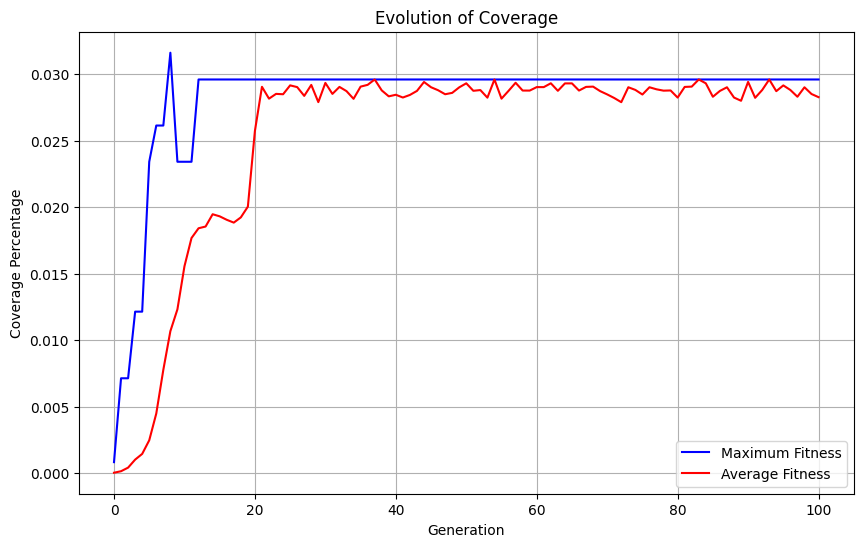

In [24]:
# Visualize the solution
# ga.visualize_solution(sensor_positions)

# Plot evolution progress
gen = logbook.select("gen")
fit_max = logbook.select("max")
fit_avg = logbook.select("avg")

plt.figure(figsize=(10, 6))
plt.plot(gen, fit_max, 'b-', label='Maximum Fitness')
plt.plot(gen, fit_avg, 'r-', label='Average Fitness')
plt.title('Evolution of Coverage')
plt.xlabel('Generation')
plt.ylabel('Coverage Percentage')
plt.legend()
plt.grid(True)
plt.show()

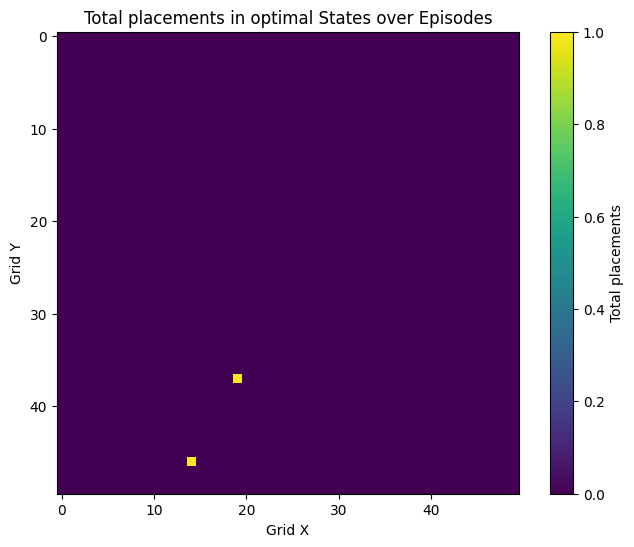

In [25]:
# Compute sum of optimal_states over all episodes
# Assumes that each info["optimal_states"] is a numpy array of the same shape
mean_optimal_states =np.zeros((ga.env.nx, ga.env.ny))
mean_optimal_states[37, 19] = 1
mean_optimal_states[46, 14] = 1

# Plot grid of mean optimal_states
plt.figure(figsize=(8, 6))
plt.imshow(mean_optimal_states, cmap='viridis', interpolation='nearest')
plt.title('Total placements in optimal States over Episodes')
plt.colorbar(label='Total placements')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.show()

## Plots

In [9]:
env = ib_dqn_old_a.env

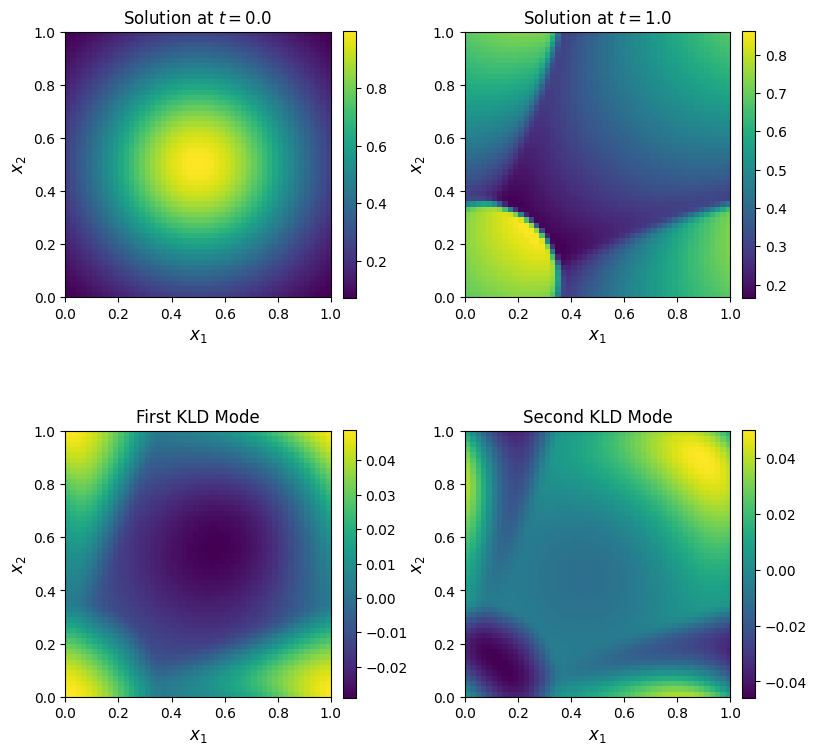

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

im1 = axes[0, 0].imshow(env.pde_field[:, :, 0].T, origin='lower', extent=[0, 1, 0, 1])
axes[0, 0].set_title(rf"Solution at $t = {env.pde_system.t_steps[0]}$", fontsize=12)
axes[0, 0].set_xlabel(r'$x_1$', fontsize=12)
axes[0, 0].set_ylabel(r'$x_2$', fontsize=12)
cbar1 = fig.colorbar(im1, ax=axes[0, 0], fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)

# Second subplot
im2 = axes[0, 1].imshow(env.pde_field[:, :, -1].T, origin='lower', extent=[0, 1, 0, 1])
axes[0, 1].set_title(rf"Solution at $t = {env.pde_system.t_steps[-1]}$", fontsize=12)
axes[0, 1].set_xlabel(r'$x_1$', fontsize=12)
axes[0, 1].set_ylabel(r'$x_2$', fontsize=12)
cbar2 = fig.colorbar(im2, ax=axes[0, 1], fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=10)

# Third subplot
im3 = axes[1, 0].imshow(env.modes[:, 0].reshape(env.nx, env.ny).T, origin='lower', extent=[0, 1, 0, 1])
axes[1, 0].set_title(rf"First KLD Mode", fontsize=12)
axes[1, 0].set_xlabel(r'$x_1$', fontsize=12)
axes[1, 0].set_ylabel(r'$x_2$', fontsize=12)
cbar3 = fig.colorbar(im3, ax=axes[1, 0], fraction=0.046, pad=0.04)
cbar3.ax.tick_params(labelsize=10)

# Fourth subplot
im4 = axes[1, 1].imshow(env.modes[:, 1].reshape(env.nx, env.ny), origin='lower', extent=[0, 1, 0, 1])
axes[1, 1].set_title(rf"Second KLD Mode", fontsize=12)
axes[1, 1].set_xlabel(r'$x_1$', fontsize=12)
axes[1, 1].set_ylabel(r'$x_2$', fontsize=12)
cbar4 = fig.colorbar(im4, ax=axes[1, 1], fraction=0.046, pad=0.04)
cbar4.ax.tick_params(labelsize=10)

# Adjust layout to avoid overlap
plt.tight_layout(pad=0.1)
# plt.savefig("IB2dSol.pdf", dpi=400)

# Show the plot
plt.show()


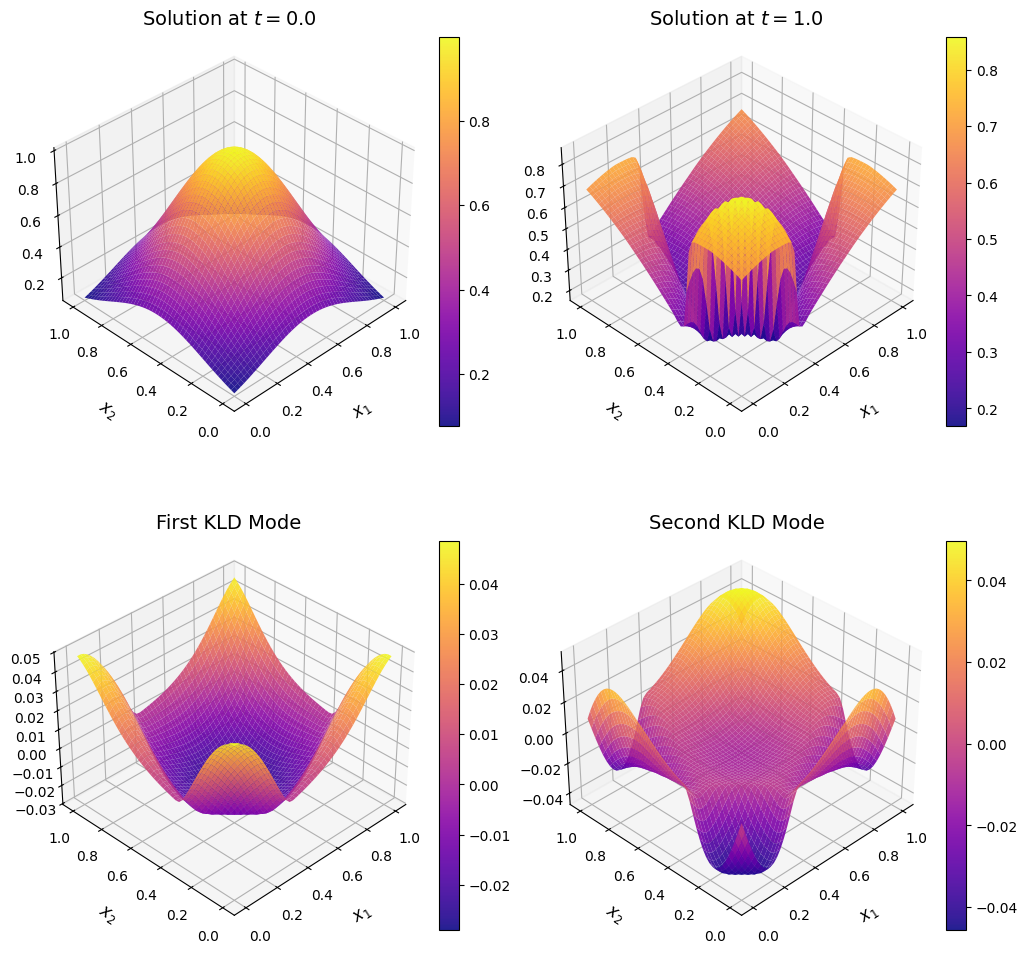

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource

# Create a 2x2 grid of 3D subplots
fig = plt.figure(figsize=(12, 12))  # Increase size for better visibility

# Generate grid points
x = np.linspace(0, 1, env.nx)
y = np.linspace(0, 1, env.ny)
X, Y = np.meshgrid(x, y)

# Define the plots
datasets = [
    (env.pde_field[:, :, 0].T, rf"Solution at $t = {env.pde_system.t_steps[0]}$"),
    (env.pde_field[:, :, -1].T, rf"Solution at $t = {env.pde_system.t_steps[-1]}$"),
    (env.modes[:, 0].reshape(env.nx, env.ny).T, "First KLD Mode"),
    (env.modes[:, 1].reshape(env.nx, env.ny).T, "Second KLD Mode")
]

# Create 3D subplots
for i, (data, title) in enumerate(datasets):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    
    # Compute shading effect
    ls = LightSource(azdeg=115, altdeg=65)
    shaded = ls.shade(data, cmap=cm.coolwarm, vert_exag=0.1, blend_mode='soft')

    # Create surface plot
    surf = ax.plot_surface(X, Y, data, cmap='plasma', edgecolor='none', alpha=0.9)
    
    # Set titles and labels
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel(r'$x_1$', fontsize=12, labelpad=10)
    ax.set_ylabel(r'$x_2$', fontsize=12, labelpad=10)
    # ax.set_zlabel(r'$u(x_1, x_2)$', fontsize=12, labelpad=10)

    # Adjust viewing angle
    ax.view_init(elev=35, azim=-135)

    # Add colorbar
    fig.colorbar(surf, ax=ax, fraction=0.046, pad=0.04)

# Adjust layout
# plt.tight_layout()
# plt.savefig("3D_Poster_Plot.pdf", dpi=400, bbox_inches='tight')

# Show the plot
plt.show()


In [39]:
env = ib_dqn_new_a.env

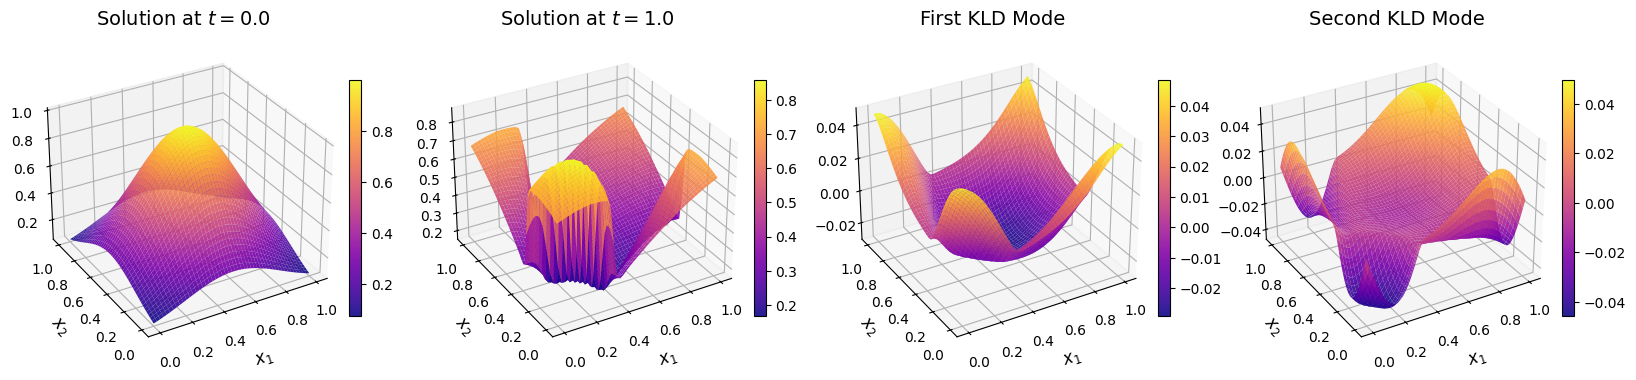

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource

# Create a 1x4 grid of 3D subplots
fig = plt.figure(figsize=(20, 6))  # Wider figure for 1x4 layout

# Generate grid points
x = np.linspace(0, 1, env.nx)
y = np.linspace(0, 1, env.ny)
X, Y = np.meshgrid(x, y)

# Define the plots
datasets = [
    (env.pde_field[:, :, 0].T, rf"Solution at $t = {env.pde_system.t_steps[0]}$"),
    (env.pde_field[:, :, -1].T, rf"Solution at $t = {env.pde_system.t_steps[-1]}$"),
    (env.modes[:, 0].reshape(env.nx, env.ny).T, "First KLD Mode"),
    (env.modes[:, 1].reshape(env.nx, env.ny).T, "Second KLD Mode")
]

# Create 3D subplots in a single row
for i, (data, title) in enumerate(datasets):
    ax = fig.add_subplot(1, 4, i + 1, projection='3d')
    
    # Compute shading effect
    ls = LightSource(azdeg=315, altdeg=65)
    shaded = ls.shade(data, cmap=cm.coolwarm, vert_exag=0.1, blend_mode='soft')

    # Create surface plot
    surf = ax.plot_surface(X, Y, data, cmap='plasma', edgecolor='none', alpha=0.9)
    
    # Set titles and labels
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel(r'$x_1$', fontsize=12, labelpad=5)
    ax.set_ylabel(r'$x_2$', fontsize=12, labelpad=5)
    
    # Adjust viewing angle
    ax.view_init(elev=30, azim=-120)

    # Add colorbar (adjusted for compact layout)
    fig.colorbar(surf, ax=ax, fraction=0.035, pad=0.02)

# Save and display
plt.savefig("3D_ib2d_modes.pdf", dpi=400, bbox_inches='tight')
plt.show()


In [29]:
gym_config.old_action_space = True

In [30]:
load_dqn_test = DQN_OED(None, ib_eq, gym_config, verbose=0)

In [31]:
load_dqn_test.load(model_name="ib_dqn_old_a_1")

In [36]:
all_episode_rewards, best_rewards, optimal_states_all = load_dqn_test.evaluate(num_episodes=100)

100%|██████████| 100/100 [00:26<00:00,  3.76it/s]


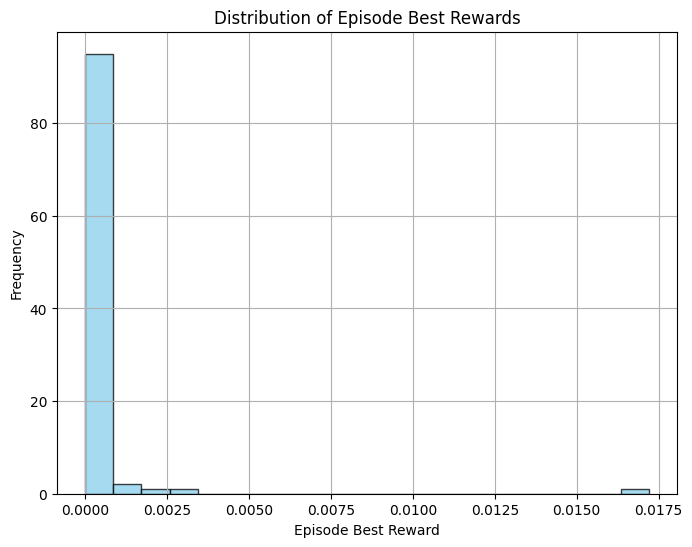

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(best_rewards, bins=20, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Episode Best Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Best Rewards')
plt.grid(True)
plt.show()

In [ ]:
best_fitness = 0.031603511808563606

In [20]:
print(f"{np.max(old_a_best_rewards):.3e}, {np.max(new_a_best_rewards):.3e}, {best_fitness:.3e}, {np.mean(old_a_best_rewards):.3e}, {np.mean(new_a_best_rewards):.3e}")

1.687e-03, 2.109e-02, 3.160e-02, 9.644e-05, 2.062e-04
